## Module 3: Multi-Agent Coordination

##### Project Definition:
* Given a defined task list (including pick and drop locations for N deliveries), operate M Crazyflie agents to complete the defined task as quickly as possible

<img src="./media/world-file.PNG"  width="50%" height="20%">

* Here, number of tasks (N) is 4, and number of Crazyflie agents (M) is 3.
* See image below for a graphical representation of the task list (specific information is provided in the `config.yaml` file)

<img src="./media/robosys-module-3-project.PNG"  width="50%" height="30%">

<br>

##### What to Do:

1. Review and understand task and agent definitions in STEP 1 below

2. Review and understand the *Multi-agent task assignment* implementation in STEP 2 below

3. Implement a *Multi-agent path finding* algorithm (STEP 3 below) that computes a conflict-free paths/trajectory for each agent

4. Integrate your trajectory-following algorithm from Module 2 (STEP 4 below)

<br>




#### STEP 1: Define the task list, agent list and environment parameters

In [1]:
from scripts.utils import Task, Position, State, VelCommand
import yaml
import time

# load configuration file from YAML file
with open('./scripts/config.yaml', 'r') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

use_hardware = config['use_hardware']
agent_init = config['agent_init']
colors = config['agent_colors']
time_delta = config['time_delta']
env = config['map']
num_agents = len(agent_init)


print('Starting up the notebook for the Multi-Agent Coordination module... \n')
print(f'Number of Agents: [{num_agents}] -> {[agent_init[i][0] for i in range(len(agent_init))]}')
print(f'Use Hardware: [{use_hardware}]')
print(f'Time Delta (dt): [{time_delta}]')



Starting up the notebook for the Multi-Agent Coordination module... 

Number of Agents: [3] -> ['CF4', 'CF5', 'CF6']
Use Hardware: [False]
Time Delta (dt): [0.25]


##### 1.A. Define Task List

In [3]:
# create the task list
task_list = dict()
pick_locations = config['pick_loc']
drop_locations = config['drop_loc']

print('-----------------------')
print('Task List')
print('-----------------------')

for i in range(len(pick_locations)):
    t = Task(pick_loc=Position(x=pick_locations[i][1][0], y=pick_locations[i][1][1], z=pick_locations[i][1][2]),
             drop_loc=Position(x=drop_locations[i][1][0], y=drop_locations[i][1][1], z=0.0), 
             pick_id=pick_locations[i][0], 
             drop_id=drop_locations[i][0], 
             id='T'+str(i), 
             priority=i)
    task_list[pick_locations[i][0]] = t

    print(f'Task {t.id}: {t.pick_id} -> {t.drop_id}')

print('-----------------------')
    

-----------------------
Task List
-----------------------
Task T0: P1 -> D1
Task T1: P2 -> D2
Task T2: P3 -> D2
Task T3: P4 -> D1
-----------------------


##### 1.B. Define Agent List

In [4]:
# create the agent list

from scripts.Quadrotor import Quadrotor
from scripts.Simulation import Simulation

print('----------------------------------')
print('Agent List (with home position)')
print('----------------------------------')

agent_list = dict()
for i in range(num_agents):
    # define initial state
    start = State(x_pos=agent_init[i][1][0], 
                  y_pos=agent_init[i][1][1])
    # define the appropriate URI
    uri = 'radio://0/'+agent_init[i][0][2:]+'0/2M/E7E7E7E7E7'
    # define agent as Quadrotor
    agent = Quadrotor(init_state=start, 
                      color=colors[i], 
                      id=agent_init[i][0], 
                      uri=uri,
                      take_off_height=agent_init[i][2], 
                      hardware_flag=use_hardware,
                      dt=time_delta)
    agent_list[agent._id] = agent

    if use_hardware:
        print(f'Agent {agent._id}: {agent_list[agent._id].get_pos().x, agent_list[agent._id].get_pos().y} \
              ---> {uri}')
    else:
        print(f'Agent {agent._id}: {agent_list[agent._id].get_pos().x, agent_list[agent._id].get_pos().y} ')


print('----------------------------------')

if use_hardware:
    print('\n !!!!!!!!Please ensure you confirm the Crazyflies are connected to the right radio channels!!!!!!!!')



----------------------------------
Agent List (with home position)
----------------------------------
Agent CF4: (-0.6, 0.9) 
Agent CF5: (-0.6, 0.3) 
Agent CF6: (-0.6, -0.3) 
----------------------------------


#### STEP 2: Implement Multi-Agent Task Assignment

##### 2.A. Define the Ground Constrol System & compute assignment

[-0.9, 2.1] [-0.9, 1.1]


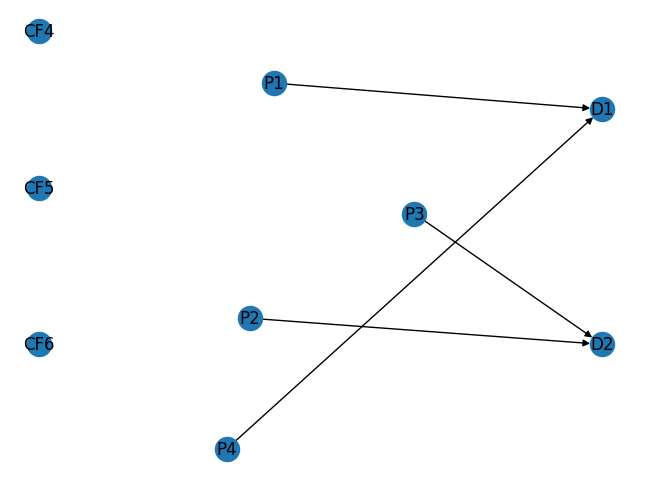

In [5]:
from scripts.GroundControl import GroundControlSystem

# instantiate ground control system object
gcs = GroundControlSystem(agent_list=agent_list, 
                          task_list=task_list,
                          env=env)

# creates a directed graph based on the agents and task list
gcs.set_task_graph(draw=True) # toggle draw True or False


----------------------
Task Assignment
----------------------
Agent CF6 : P4 -> D1
Agent CF4 : P1 -> D1
Agent CF5 : P2 -> D2
Agent CF5 : P3 -> D2
----------------------


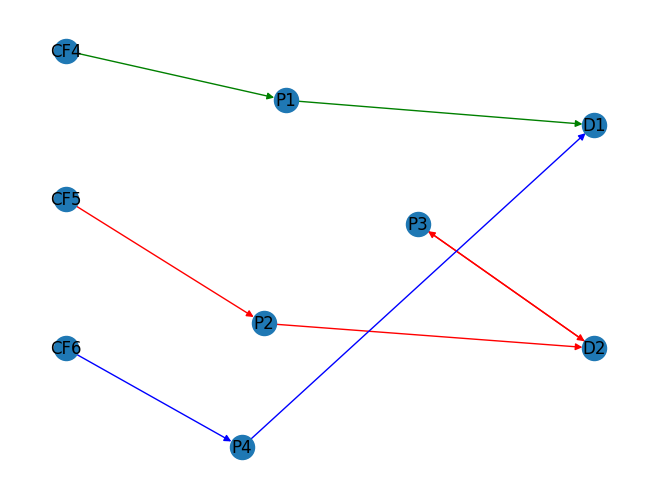

In [6]:

print('----------------------')
print('Task Assignment')
print('----------------------')

# create task assignment
gcs.create_task_assignment()

print('----------------------')


# observe task assignment
task_assignment = gcs.get_task_assignment(draw=True)


#### STEP 3: Implement Multi-Agent Path Finding

In [7]:
# 2D plot of the scene
import plotly.graph_objects as go
fig1 = go.Figure()
fig2 = go.Figure()

sim = Simulation(env=env, fig1=fig1, fig2=fig2)

sim.add_agents(agent_list)
sim.set_task_list(task_list)
sim.init_plot()


##### 3.A. Compute collision-free paths

In [8]:
# Here, you should implement your multi-agent path finding algorithm...
gcs.generate_agent_paths()



# -----------------------------
# Plotter
# sim.init_plot()

Generating agent paths...
20 | [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
19 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
18 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
17 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
16 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
15 | [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
14 | [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
13 | [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
12 | [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
11 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
10 | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
9  | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
8  | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
7  | [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
6  | [0 

### Main Control Loop

#### STEP 4: Implement the Path planning & collision avoidance algorithm

In [9]:
# Upload your functions from Module 2 here

def agent_nav(self):
    V = VelCommand()
    V.vx = 0.2
    V.vy = 0.0
    V.vz = 0.0
    V.v_psi = 0.0
    
    if self._hardware_flag:
        self.velocity_setpoint_hw(V)
    else:
        self.velocity_setpoint_sim(V)


##### STEP 5: Run the Main control loop

##### 5.A. Run a hardware test [If using hardware]

In [10]:
for agent in agent_list.values():
    agent.initialize_agent()


time.sleep(3)


for agent in agent_list.values():
    agent.land()


Agent [CF4] is Taking Off!!
Agent [CF5] is Taking Off!!
Agent [CF6] is Taking Off!!
Agent [CF4] is Landing!!
Agent [CF5] is Landing!!
Agent [CF6] is Landing!!


##### 5.B. Run main loop

In [11]:
time_lapse = 0
flight_duration = 3

# initialize and take off all agents
for agent in agent_list.values():
    agent.initialize_agent()

time.sleep(3)

# while True:
while time_lapse < flight_duration: #secs

    for agent in agent_list.values():

        agent.control_method = agent_nav(agent)
        
        # print out current position of each agent
        x, y, z = agent.get_pos().x, agent.get_pos().y, agent.get_pos().z
        print(f'Agent [{agent._id}]: t = {time_lapse} -> [x, y, z] = [{x:0.3f}, {y:0.3f}, {z:0.3f}]')
        
    print('------------------------------------')    

    # keep track of time lapsed
    time_lapse += time_delta

    time.sleep(time_delta) 

# land all agents
for agent in agent_list.values():
    agent.land()

# plot the agent trajectory
sim.update_plot()


Agent [CF4] is Taking Off!!
Agent [CF5] is Taking Off!!
Agent [CF6] is Taking Off!!
Agent [CF4]: t = 0 -> [x, y, z] = [-0.550, 0.900, 0.394]
Agent [CF5]: t = 0 -> [x, y, z] = [-0.550, 0.300, 0.594]
Agent [CF6]: t = 0 -> [x, y, z] = [-0.550, -0.300, 0.795]
------------------------------------
Agent [CF4]: t = 0.25 -> [x, y, z] = [-0.500, 0.900, 0.394]
Agent [CF5]: t = 0.25 -> [x, y, z] = [-0.500, 0.300, 0.594]
Agent [CF6]: t = 0.25 -> [x, y, z] = [-0.500, -0.300, 0.795]
------------------------------------
Agent [CF4]: t = 0.5 -> [x, y, z] = [-0.450, 0.900, 0.394]
Agent [CF5]: t = 0.5 -> [x, y, z] = [-0.450, 0.300, 0.594]
Agent [CF6]: t = 0.5 -> [x, y, z] = [-0.450, -0.300, 0.795]
------------------------------------
Agent [CF4]: t = 0.75 -> [x, y, z] = [-0.400, 0.900, 0.394]
Agent [CF5]: t = 0.75 -> [x, y, z] = [-0.400, 0.300, 0.594]
Agent [CF6]: t = 0.75 -> [x, y, z] = [-0.400, -0.300, 0.795]
------------------------------------
Agent [CF4]: t = 1.0 -> [x, y, z] = [-0.350, 0.900, 0.39